In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [2]:
physical_devices =tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ",len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num GPUs Available:  1


In [3]:
train_path='/content/drive/MyDrive/CatsDogs/train'
valid_path='/content/drive/MyDrive/CatsDogs/valid'
test_path='/content/drive/MyDrive/CatsDogs/test'

In [4]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=valid_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=['cat','dog'],batch_size=10,shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [5]:
assert train_batches.n==1000
assert valid_batches.n==200
assert test_batches.n==100
assert train_batches.num_classes==valid_batches.num_classes==test_batches.num_classes==2

In [6]:
imgs,labels=next(train_batches)

In [7]:
def plotImages(images_arr):
    fig,axes=plt.subplots(1,10,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

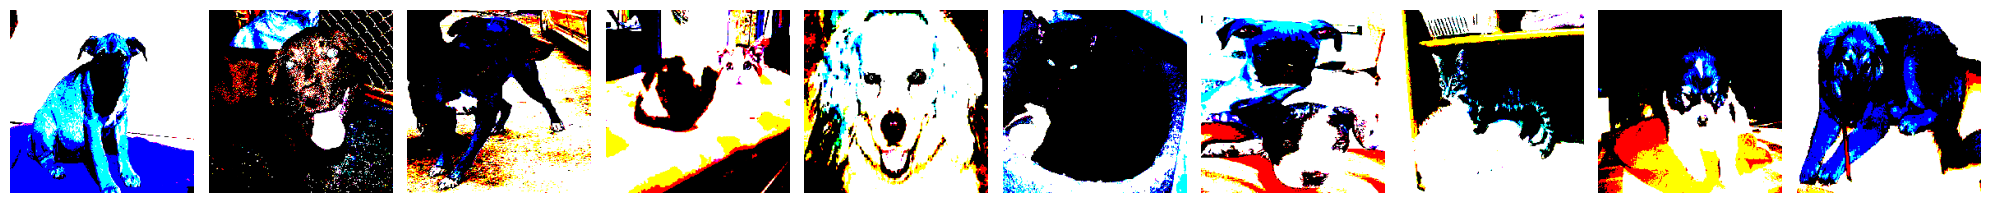

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [8]:
plotImages(imgs)
print(labels)

In [9]:
model=Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2),strides=2),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPool2D(pool_size=(2,2),strides=2),
    Flatten(),
    Dense(units=2,activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=10,verbose=2)

Epoch 1/10
100/100 - 145s - loss: 17.4715 - accuracy: 0.5610 - val_loss: 5.6726 - val_accuracy: 0.5750 - 145s/epoch - 1s/step
Epoch 2/10
100/100 - 4s - loss: 2.6438 - accuracy: 0.7570 - val_loss: 2.5207 - val_accuracy: 0.6400 - 4s/epoch - 44ms/step
Epoch 3/10
100/100 - 6s - loss: 0.4909 - accuracy: 0.8870 - val_loss: 2.2311 - val_accuracy: 0.6100 - 6s/epoch - 55ms/step
Epoch 4/10
100/100 - 4s - loss: 0.1428 - accuracy: 0.9600 - val_loss: 2.3763 - val_accuracy: 0.6450 - 4s/epoch - 43ms/step
Epoch 5/10
100/100 - 6s - loss: 0.0316 - accuracy: 0.9920 - val_loss: 2.5459 - val_accuracy: 0.6800 - 6s/epoch - 56ms/step
Epoch 6/10
100/100 - 4s - loss: 0.0139 - accuracy: 0.9970 - val_loss: 2.1508 - val_accuracy: 0.6850 - 4s/epoch - 44ms/step
Epoch 7/10
100/100 - 5s - loss: 0.0084 - accuracy: 0.9970 - val_loss: 2.1432 - val_accuracy: 0.6700 - 5s/epoch - 46ms/step
Epoch 8/10
100/100 - 5s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.2544 - val_accuracy: 0.6200 - 5s/epoch - 51ms/step
Epoch 9/10
10

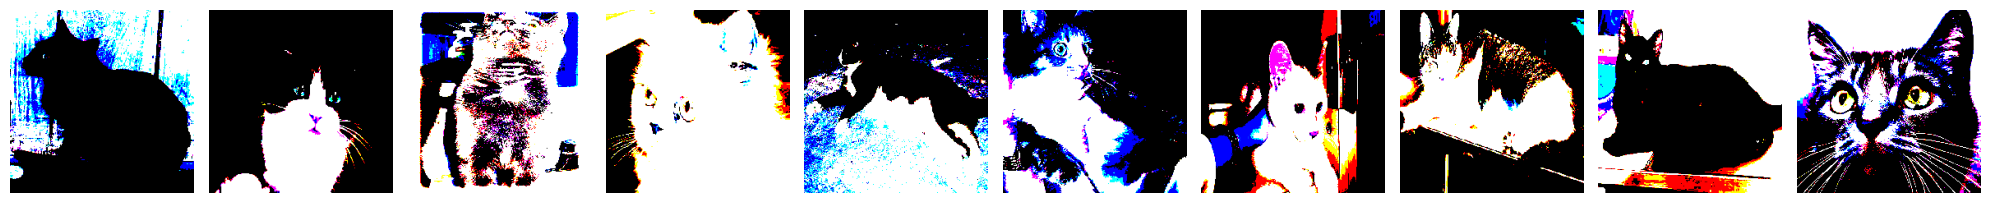

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [15]:
test_imgs,test_labels=next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [16]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [17]:
predictions=model.predict(x=test_batches,verbose=0)

In [18]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [19]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

In [20]:
def plot_confusion_matrix(cm,classes,normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')

    else:
        print('Confusion matrix without normalization')

    print(cm)

    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i,j]>thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix without normalization
[[31 19]
 [ 9 41]]


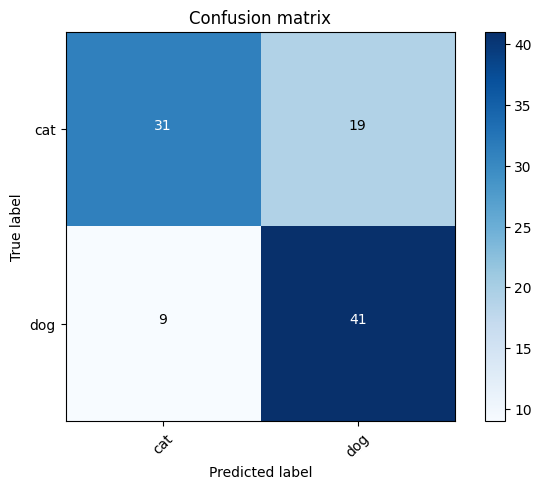

In [22]:
cm_plot_labels=['cat','dog']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion matrix')

In [23]:
vgg16_model=tf.keras.applications.vgg16.VGG16()

553467096/553467096 [==============================] - 3s 0us/step


In [24]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
type(vgg16_model)

keras.engine.functional.Functional

In [26]:
model=Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [28]:
for layer in model.layers:
    layer.trainable=False

In [29]:
model.add(Dense(units=2,activation='softmax'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [31]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=5,verbose=2)

Epoch 1/5
100/100 - 10s - loss: 0.2551 - accuracy: 0.8960 - val_loss: 0.0827 - val_accuracy: 0.9650 - 10s/epoch - 101ms/step
Epoch 2/5
100/100 - 7s - loss: 0.0709 - accuracy: 0.9760 - val_loss: 0.0618 - val_accuracy: 0.9750 - 7s/epoch - 71ms/step
Epoch 3/5
100/100 - 7s - loss: 0.0490 - accuracy: 0.9880 - val_loss: 0.0446 - val_accuracy: 0.9800 - 7s/epoch - 72ms/step
Epoch 4/5
100/100 - 9s - loss: 0.0369 - accuracy: 0.9930 - val_loss: 0.0402 - val_accuracy: 0.9750 - 9s/epoch - 86ms/step
Epoch 5/5
100/100 - 7s - loss: 0.0296 - accuracy: 0.9960 - val_loss: 0.0442 - val_accuracy: 0.9850 - 7s/epoch - 75ms/step


fine tuned vgg16

In [33]:
predictions=model.predict(x=test_batches,verbose=0)

In [38]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [39]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

In [40]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion matrix without normalization
[[49  1]
 [ 3 47]]


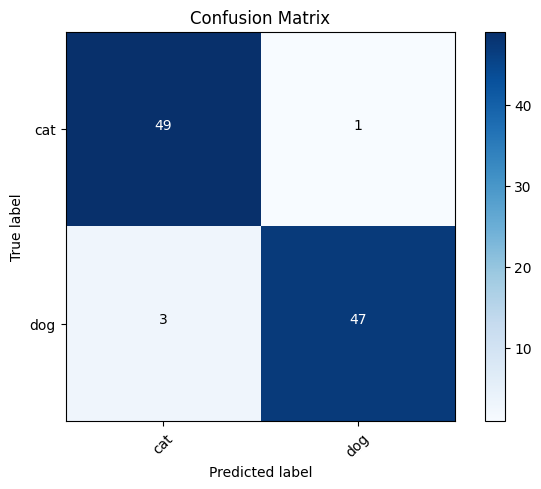

In [41]:
cm_pllot_labels=['cat','dog']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')